# Bussiness Understanding
Latar Belakang:
Home Credit menggunakan berbagai metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Perusahaan ingin mengoptimalkan potensi maksimum data yang mereka miliki. Hal ini bertujuan untuk memastikan bahwa klien yang mampu membayar dapat diterima dan pinjaman diberikan dengan prinsipal, jangka waktu, dan jadwal pembayaran yang akan memberdayakan klien mereka untuk berhasil.

Tujuan:
1. Mengidentifikasi pelanggan dengan karakteristik calon klien yang mengalami kesulitan dalam melunasi pinjaman.
2. Memprediksi kemampuan pelanggan dalam melunasi pinjaman.

Tindakan:
1. Melakukan pembersihan data dan visualisasi untuk mendapatkan wawasan bisnis yang lebih baik.
2. Membangun model menggunakan algoritma machine learning.
3. Memprediksi kemampuan pelanggan dalam melunasi pinjaman menggunakan data aplikasi uji.
4. Memberikan rekomendasi kepada perusahaan untuk meningkatkan kesuksesan klien dalam mengajukan pinjaman.

## Load Libraries and Data

In [80]:
# Library
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter
# Spliting Data
from sklearn.model_selection import train_test_split
# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import classification_report, mean_absolute_error, roc_auc_score, roc_curve, auc

In [81]:
# Dataset
applicant = pd.read_csv('data/application_train.csv')

In [82]:
applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Data Understanding

In [83]:
applicant.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
applicant.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [85]:
applicant.shape

(307511, 122)

In [86]:
applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [87]:
applicant.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Data Preparation

## Pengecekan dan Handling Missing Value

In [88]:
applicant.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [89]:
# Handling Missing Value dengan Means
for i in applicant.columns:
    if applicant[i].dtype == 'float64':
        if applicant[i].isnull().sum() > 0:
            applicant[i].fillna(applicant[i].mean(), inplace=True)

applicant.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [90]:
# Handling Missing Value dengan Modus
for i in applicant.columns:
    if applicant[i].dtype == 'object':
        if applicant[i].isnull().sum() > 0:
            applicant[i].fillna(applicant[i].mode()[0], inplace=True)

applicant.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

## Pengecekan dan Handling Outlier

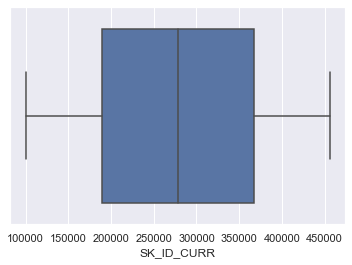

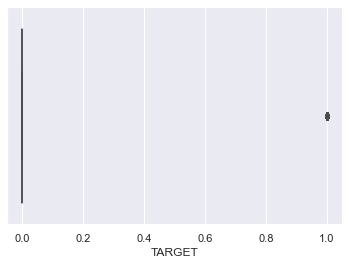

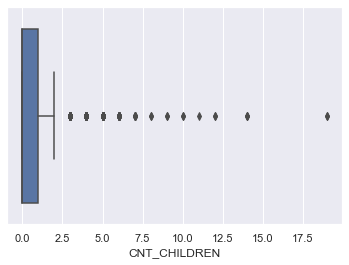

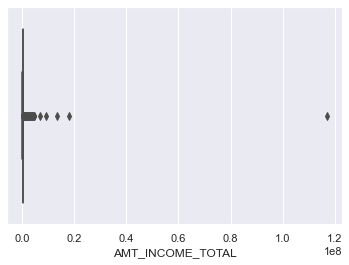

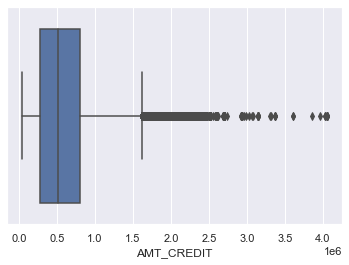

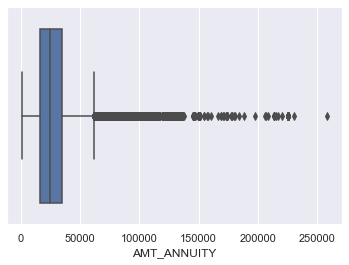

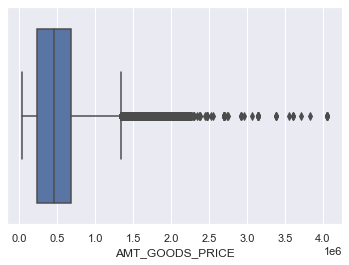

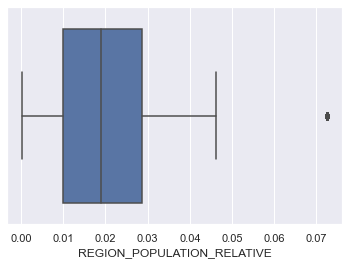

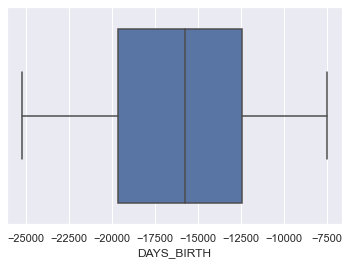

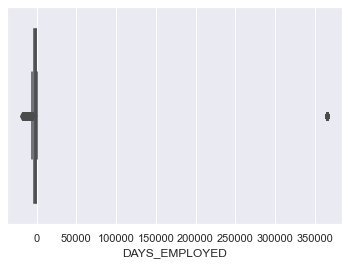

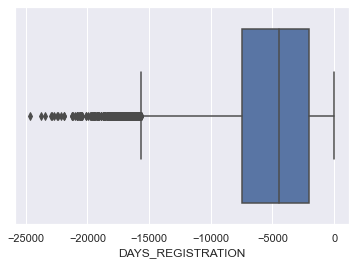

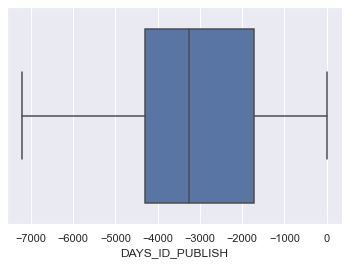

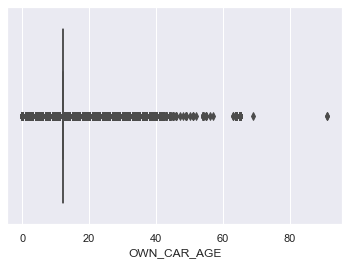

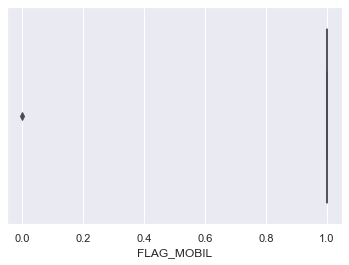

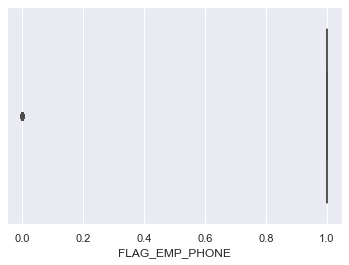

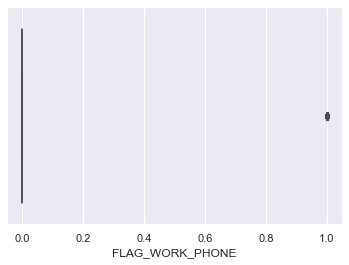

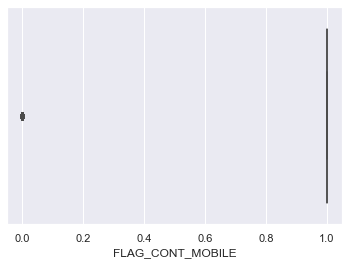

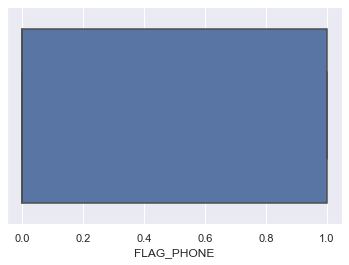

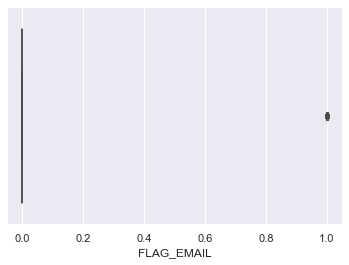

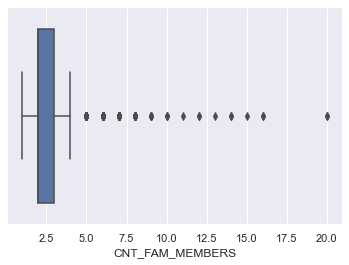

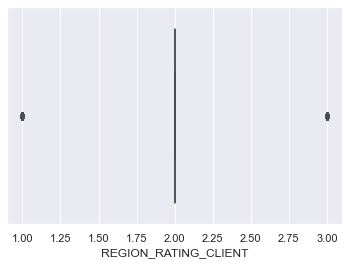

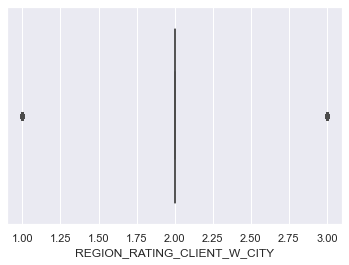

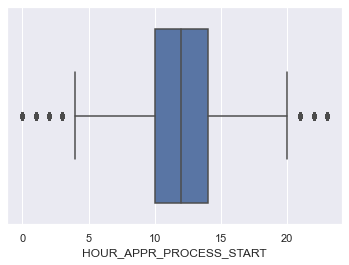

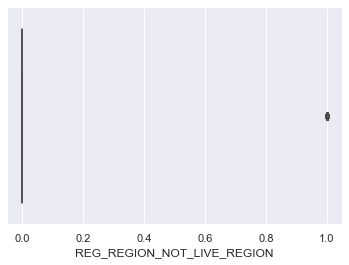

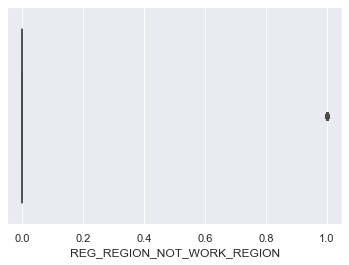

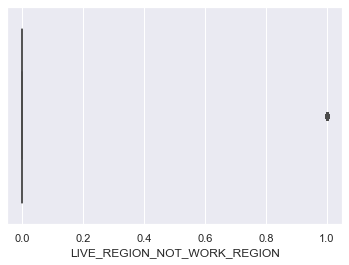

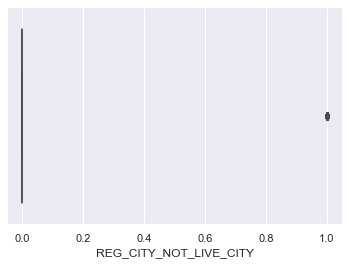

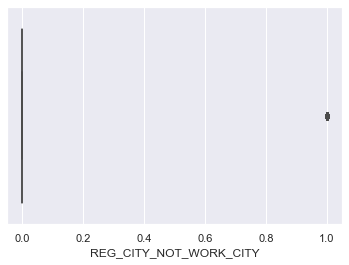

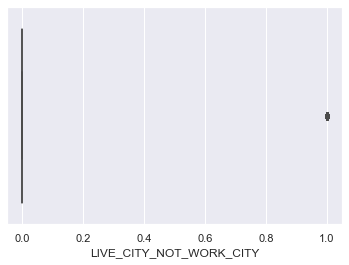

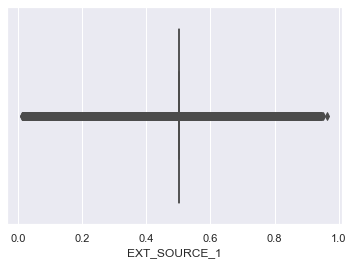

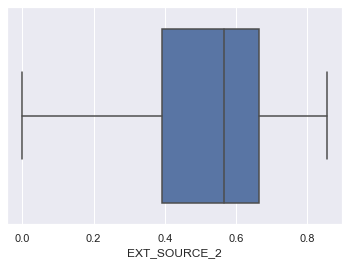

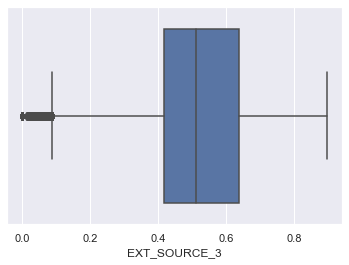

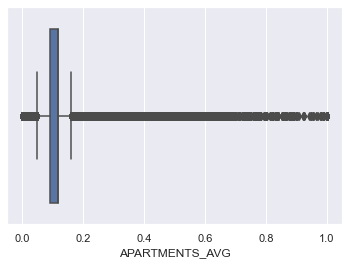

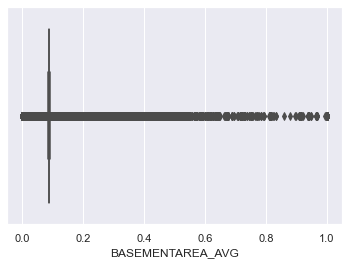

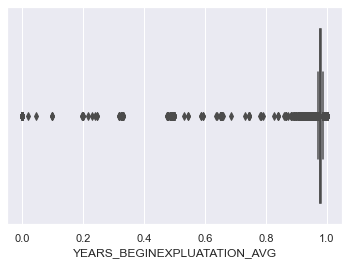

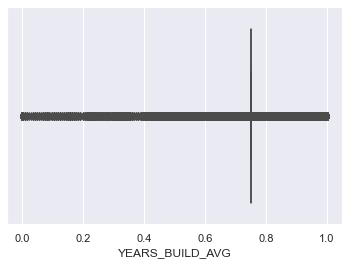

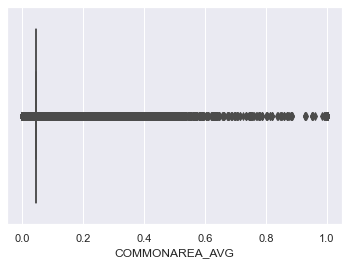

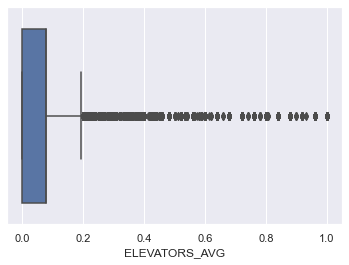

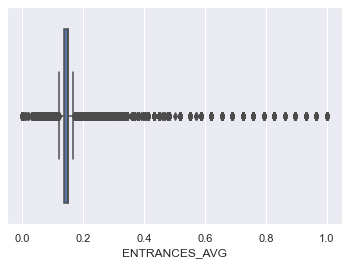

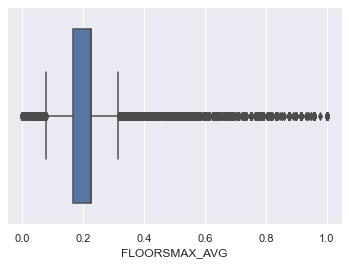

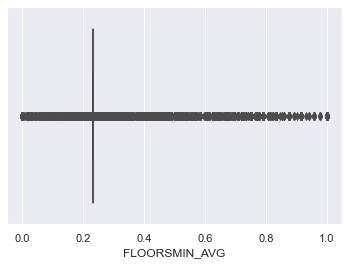

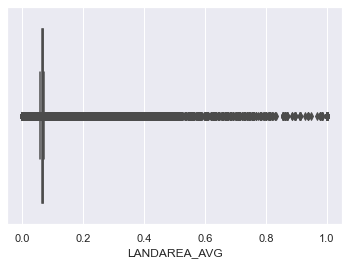

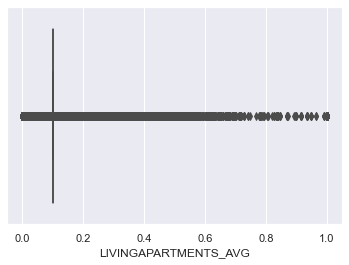

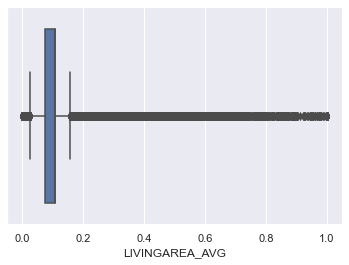

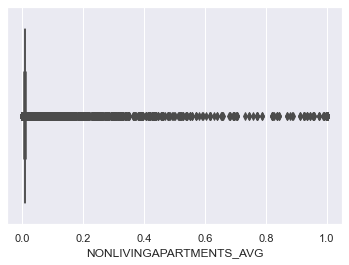

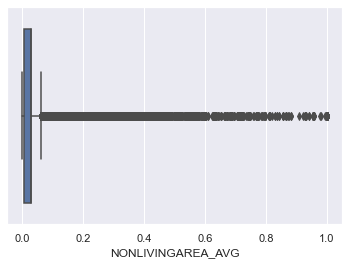

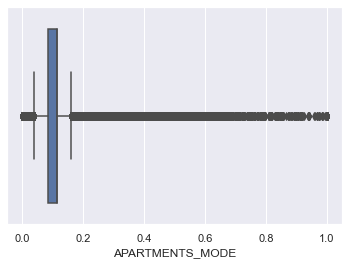

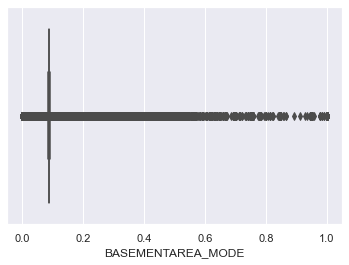

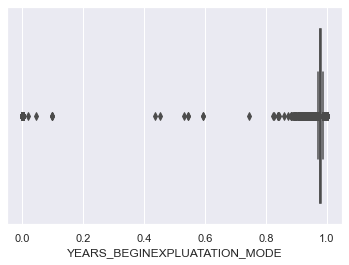

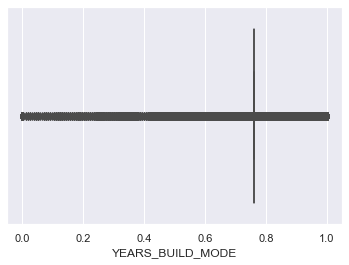

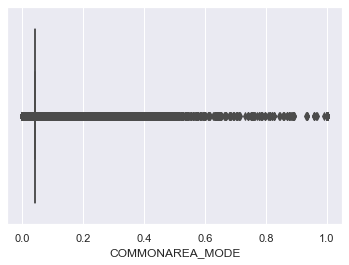

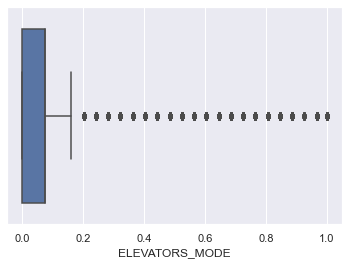

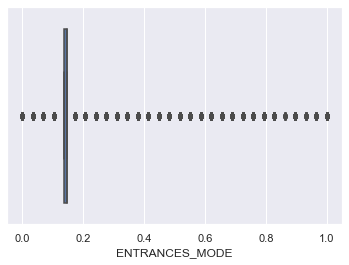

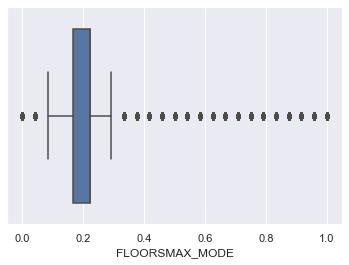

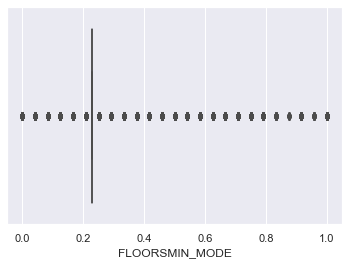

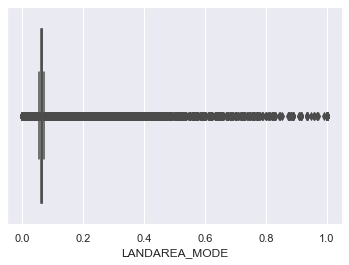

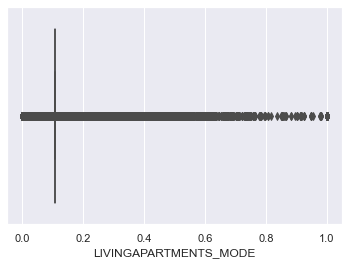

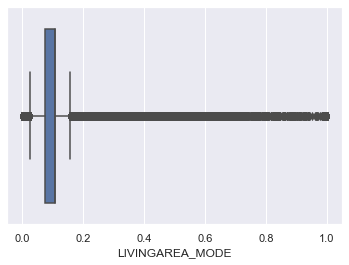

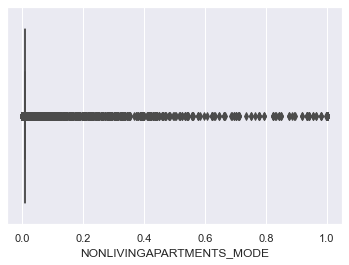

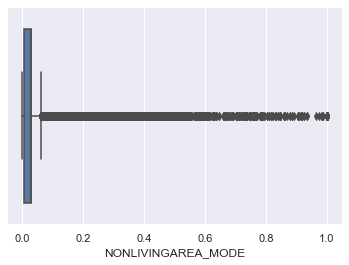

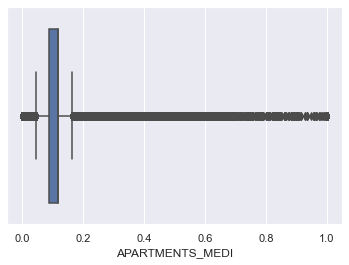

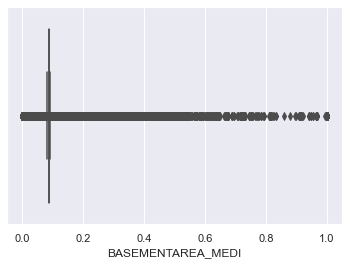

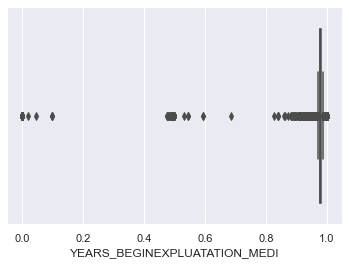

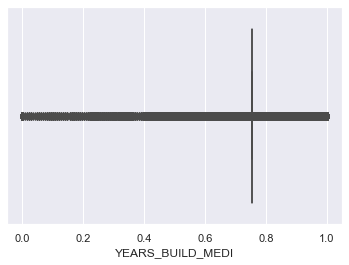

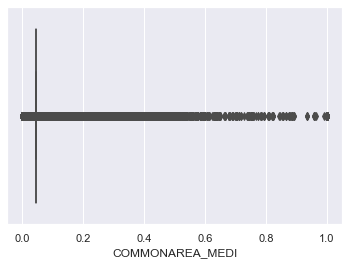

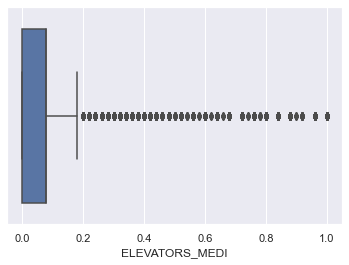

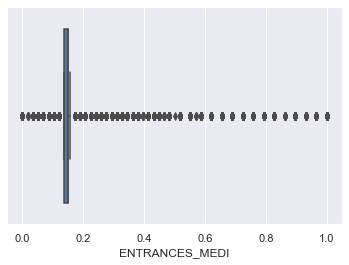

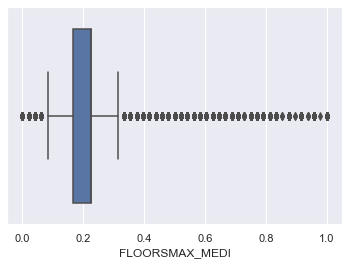

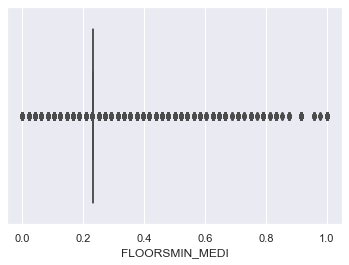

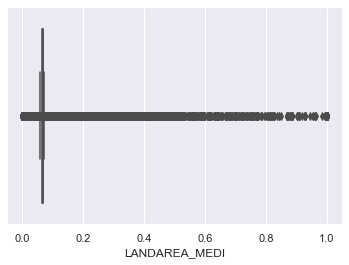

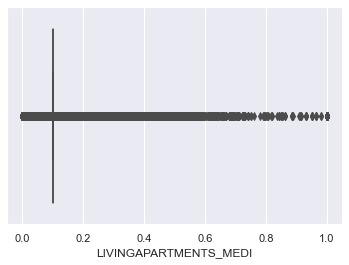

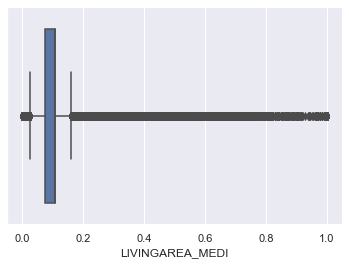

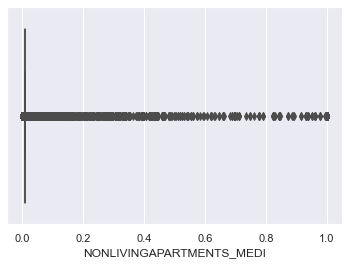

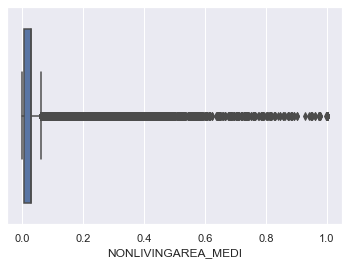

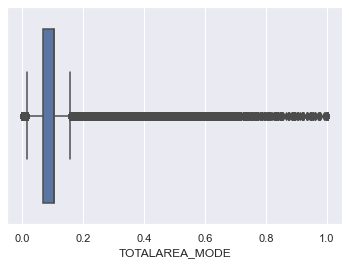

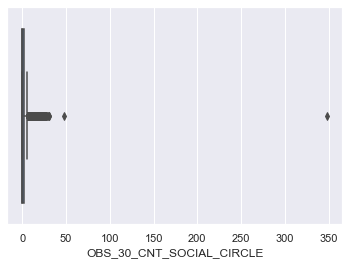

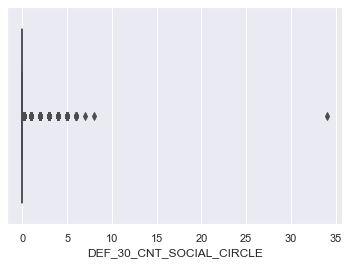

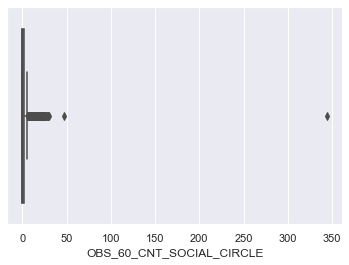

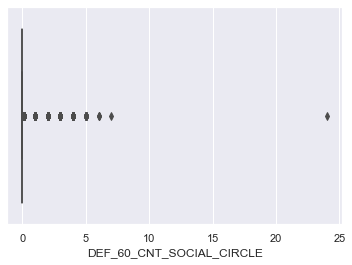

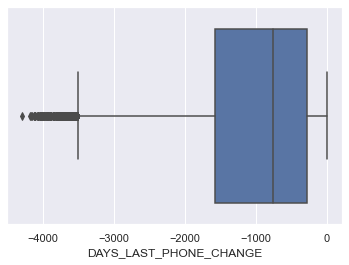

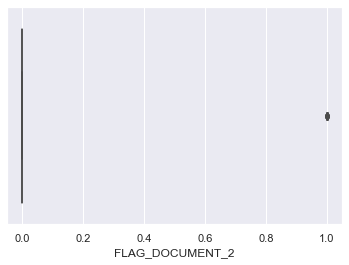

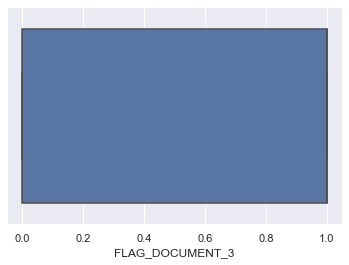

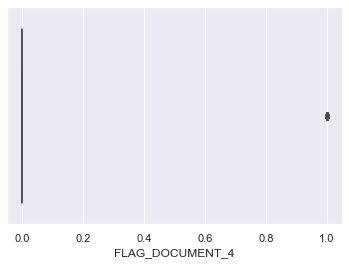

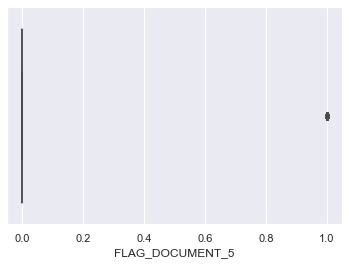

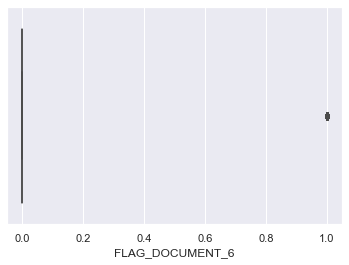

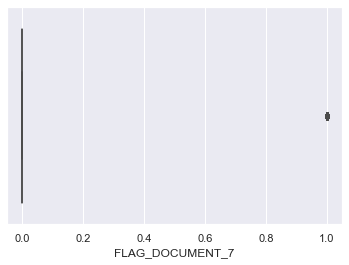

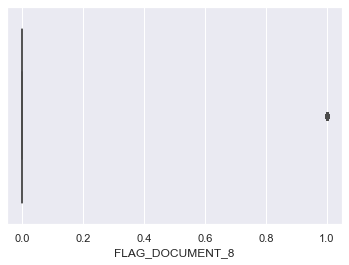

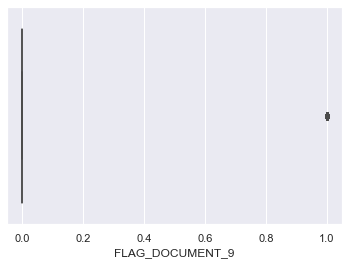

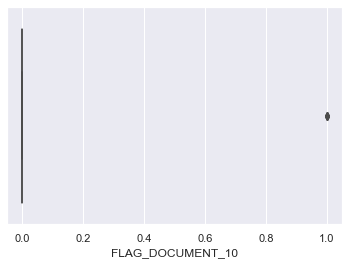

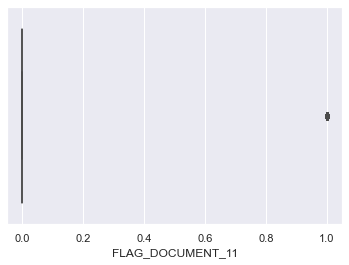

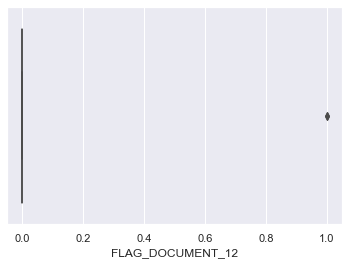

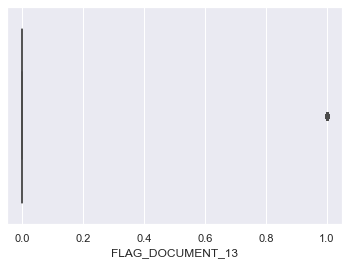

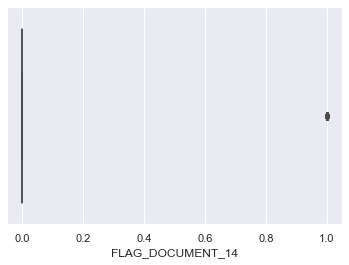

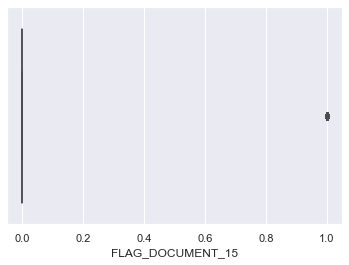

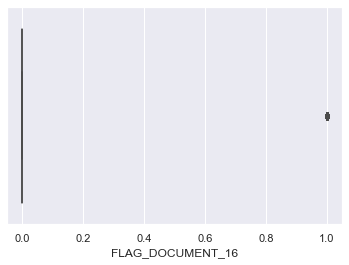

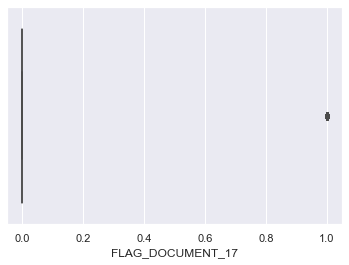

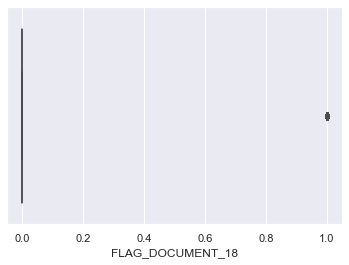

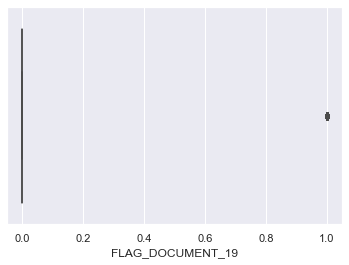

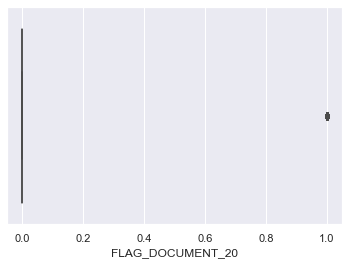

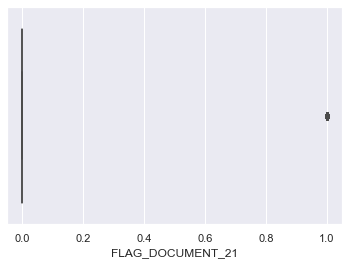

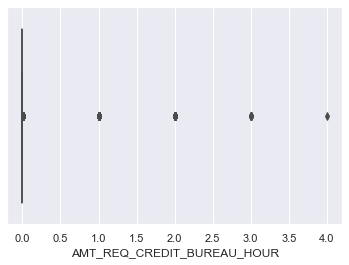

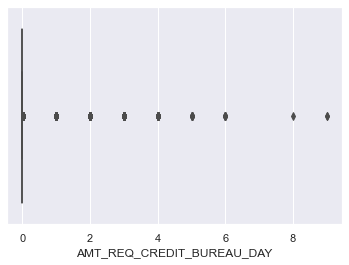

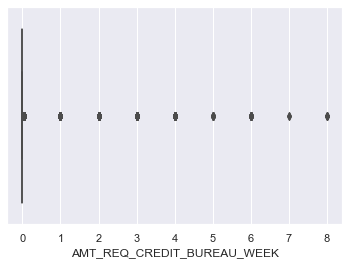

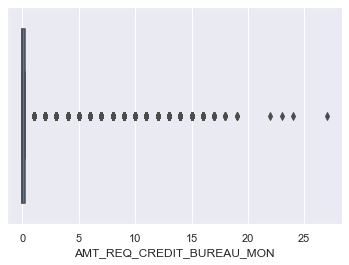

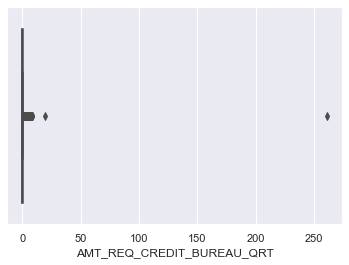

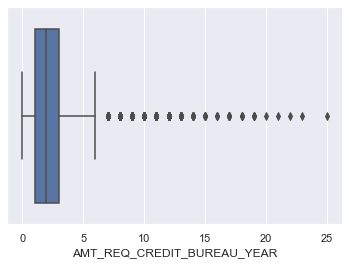

In [91]:
# Cek Outlier
for i in applicant.columns:
    if applicant[i].dtype == 'float64' or applicant[i].dtype == 'int64':
        sns.boxplot(applicant[i])
        plt.show()

In [92]:
# Handling Outlier
for i in applicant.columns:
    if applicant[i].dtype == 'float64':
        Q1 = applicant[i].quantile(0.25)
        Q3 = applicant[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        applicant[i] = np.where(applicant[i] < lower_bound, lower_bound, np.where(applicant[i] > upper_bound, upper_bound, applicant[i]))


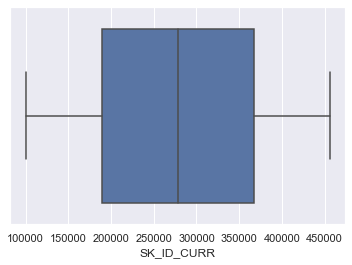

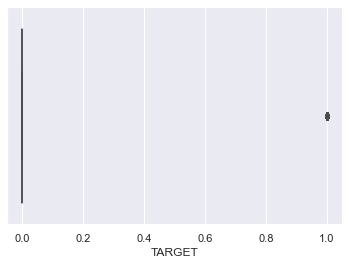

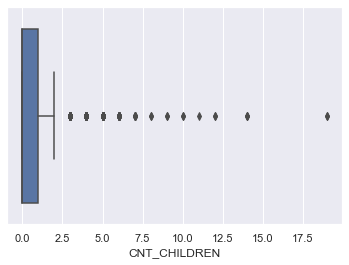

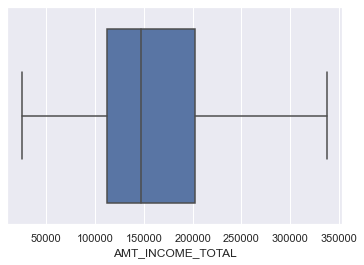

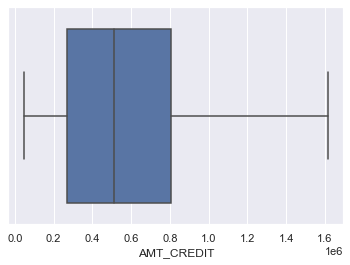

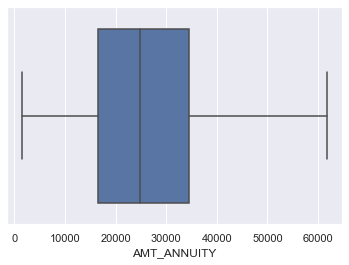

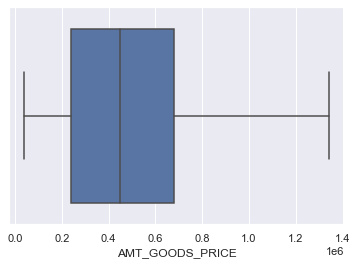

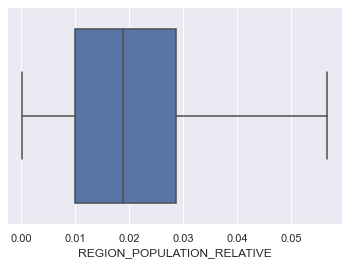

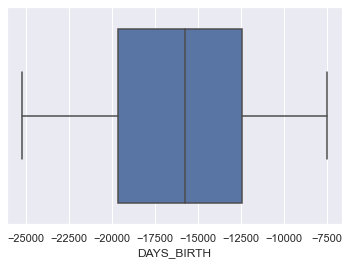

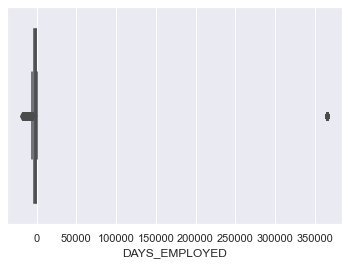

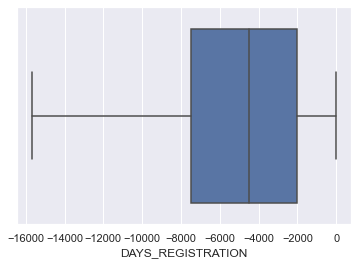

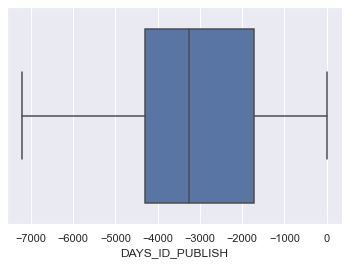

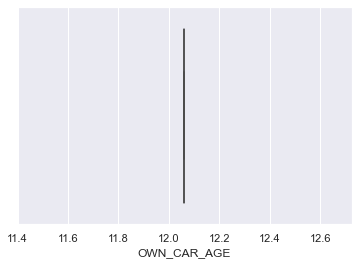

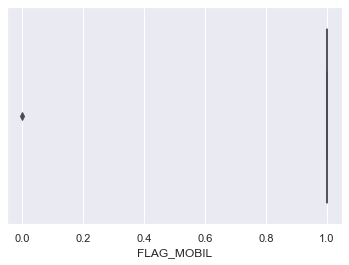

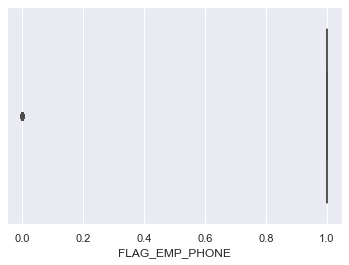

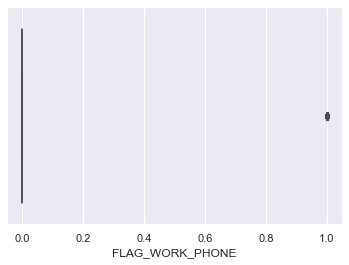

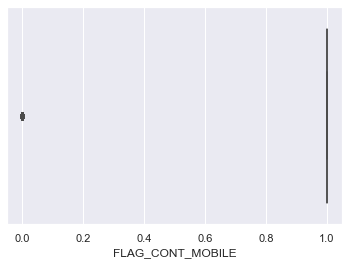

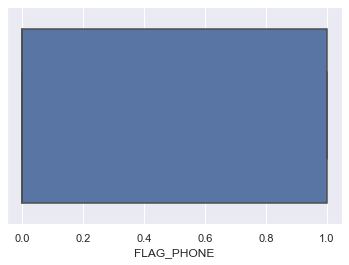

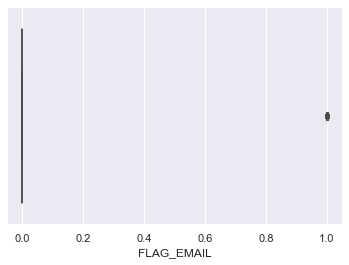

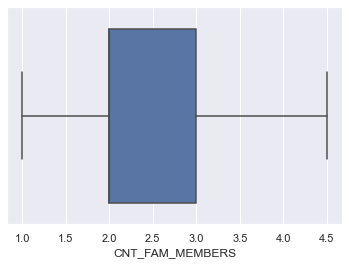

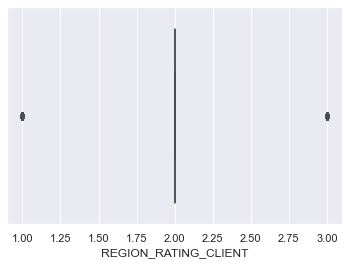

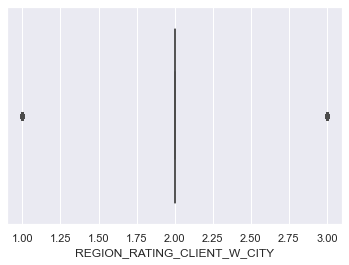

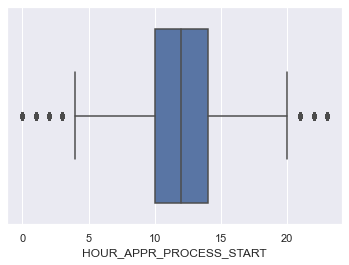

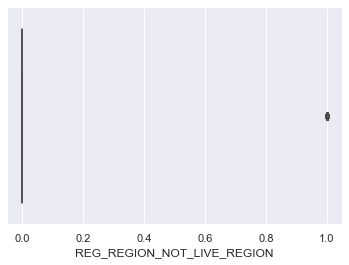

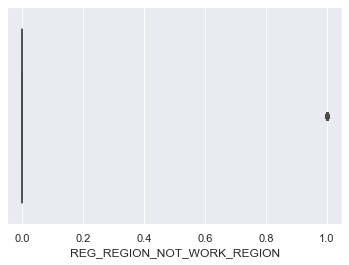

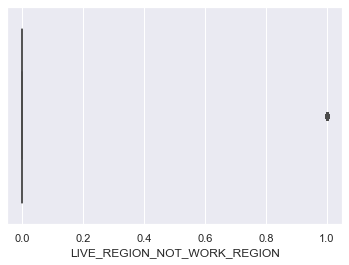

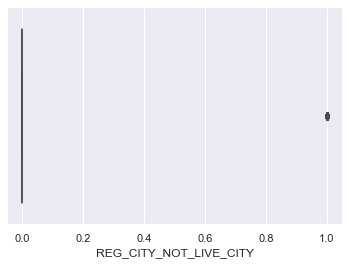

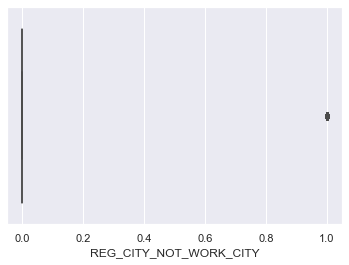

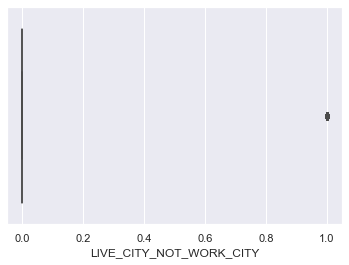

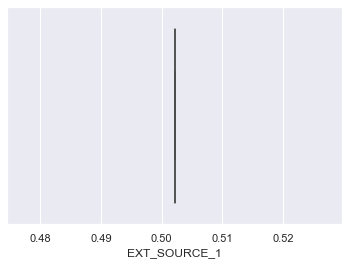

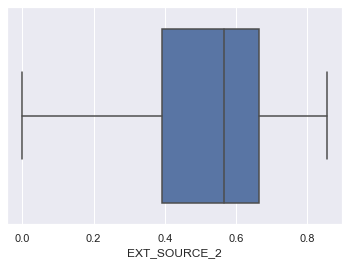

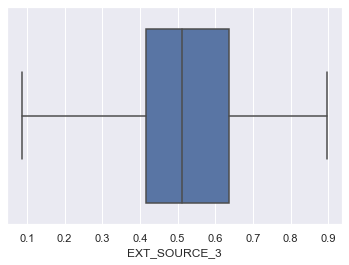

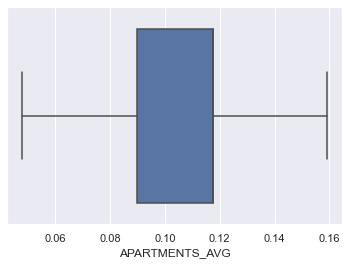

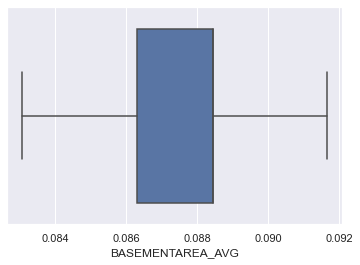

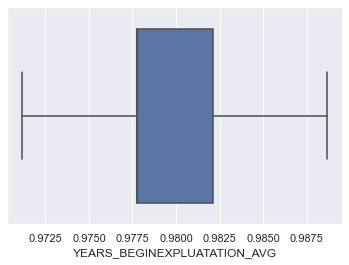

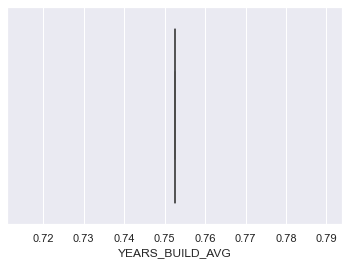

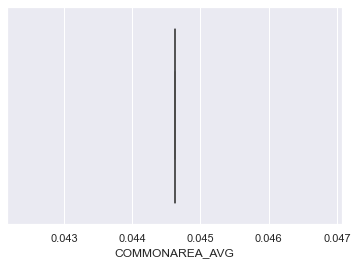

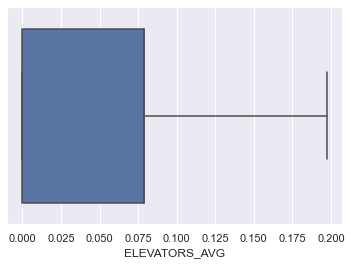

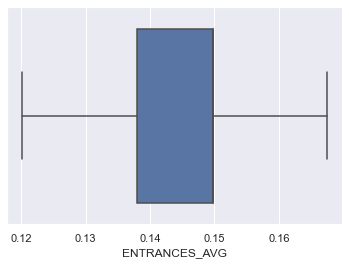

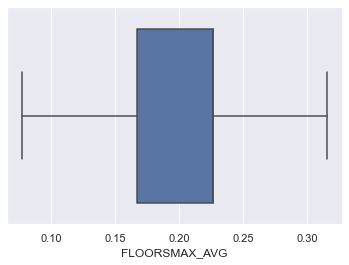

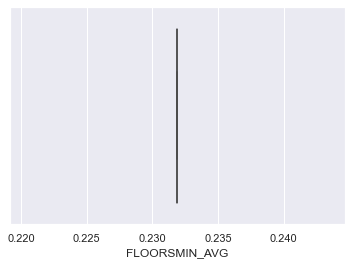

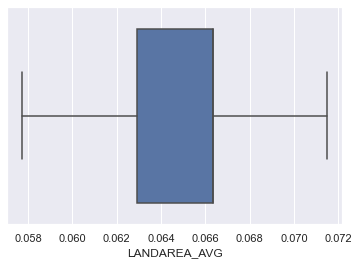

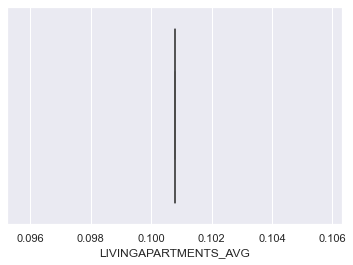

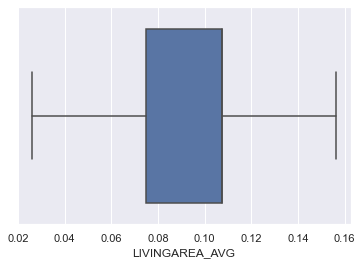

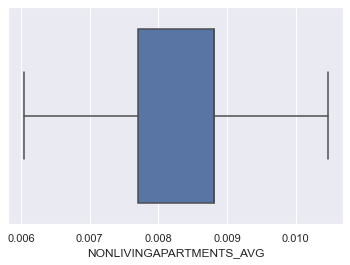

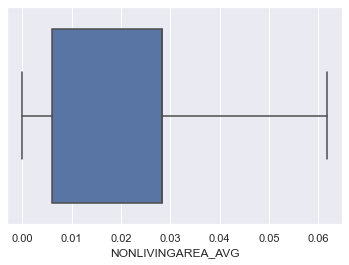

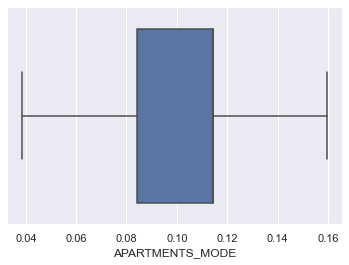

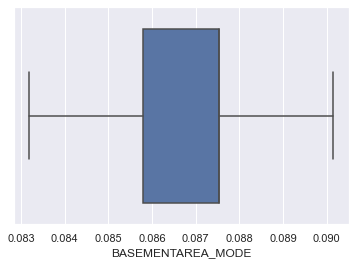

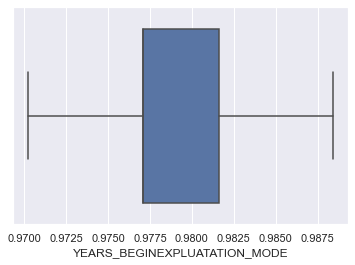

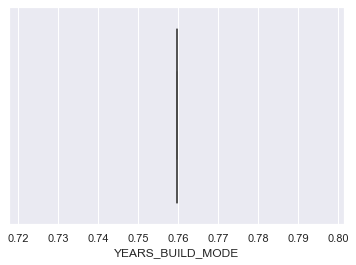

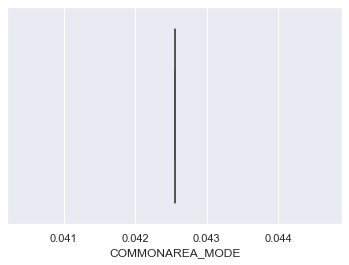

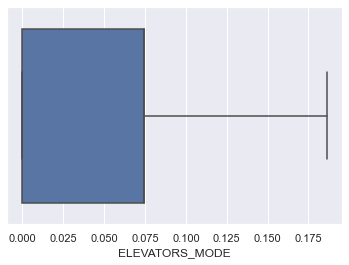

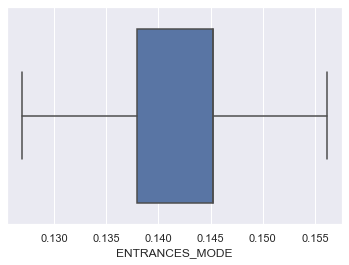

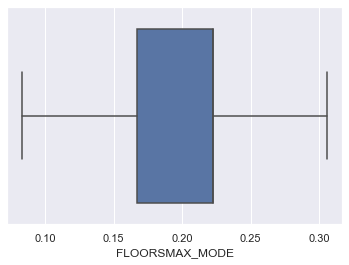

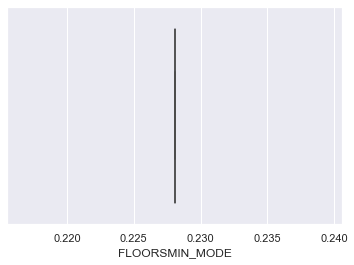

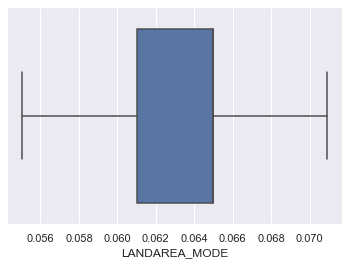

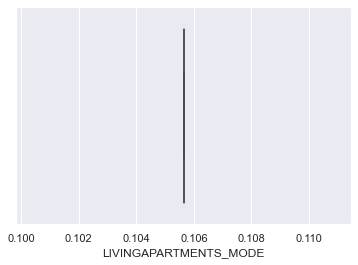

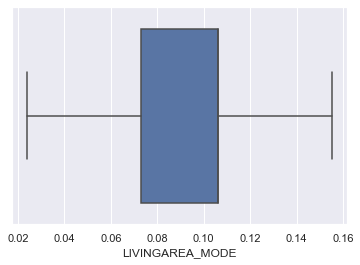

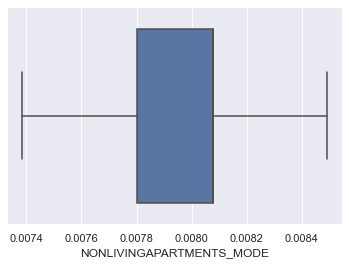

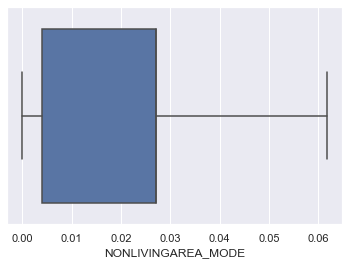

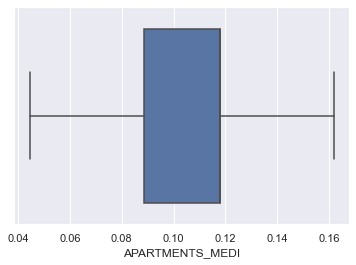

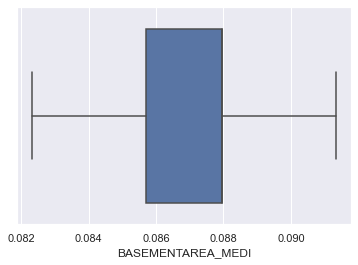

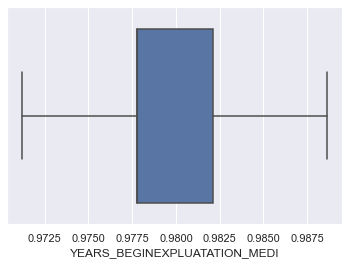

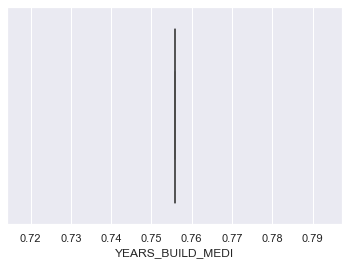

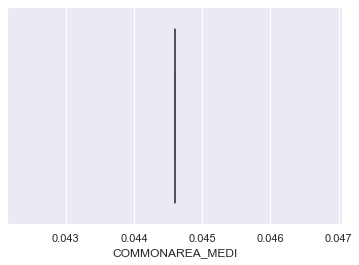

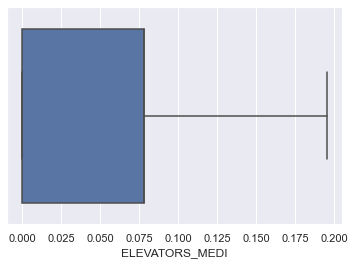

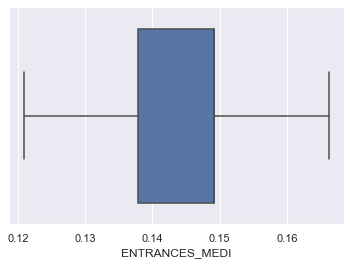

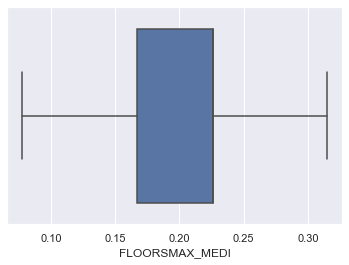

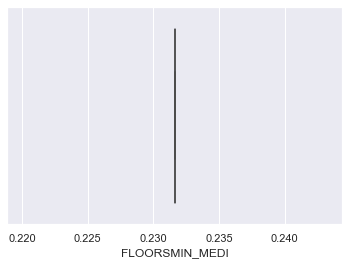

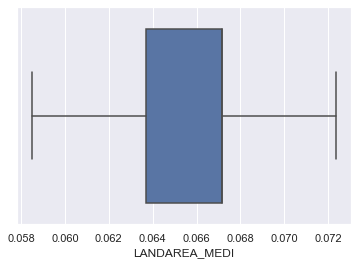

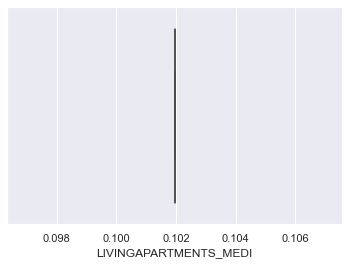

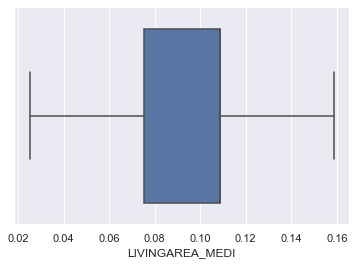

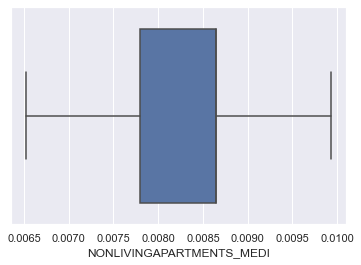

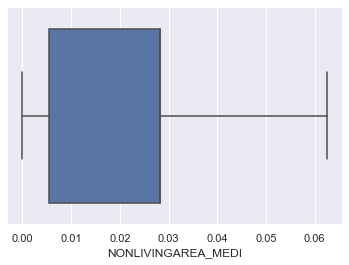

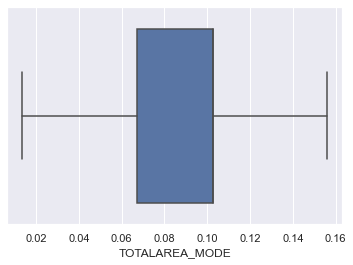

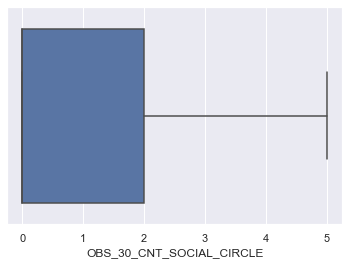

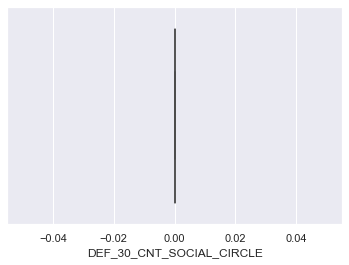

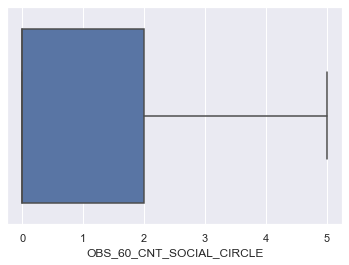

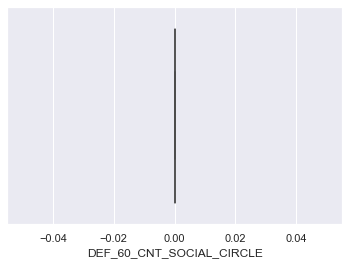

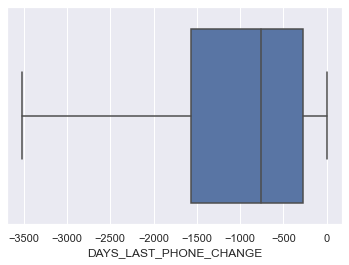

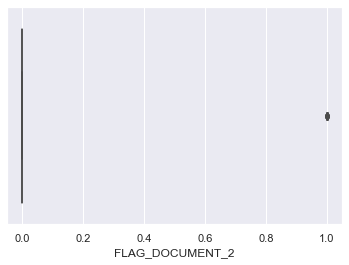

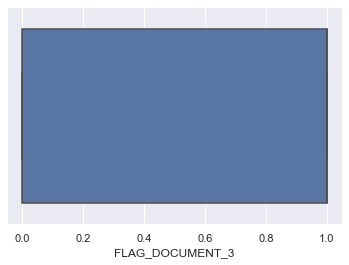

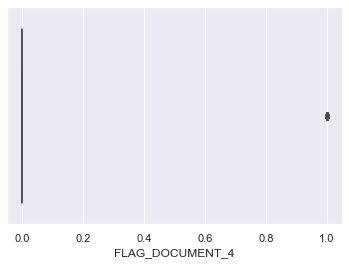

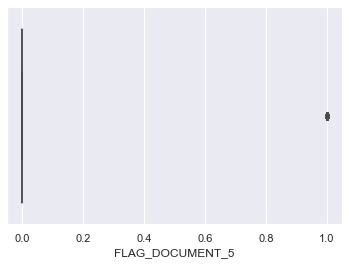

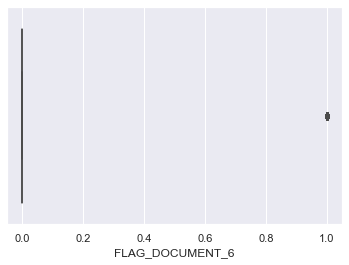

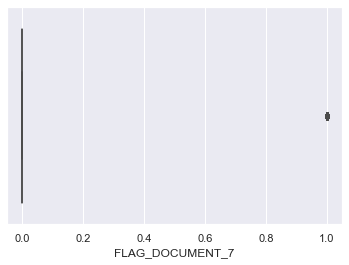

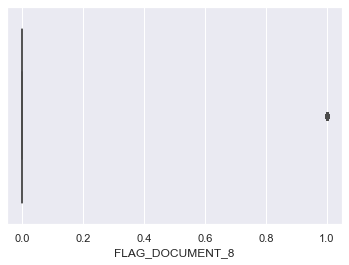

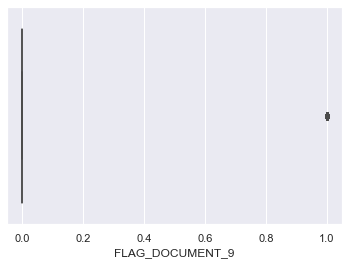

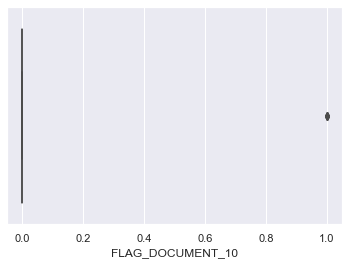

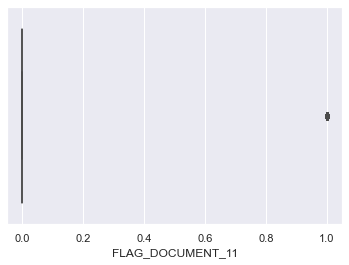

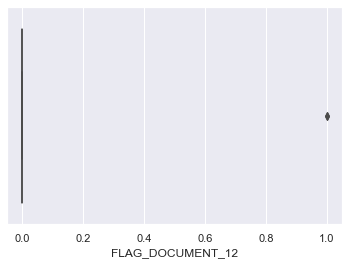

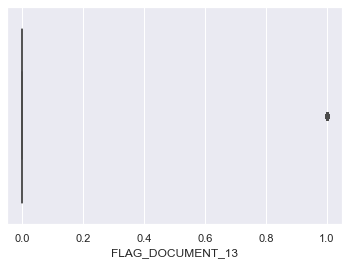

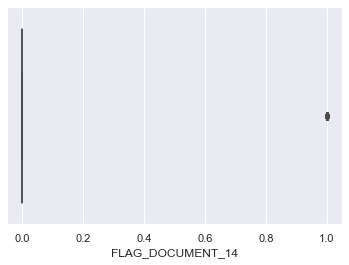

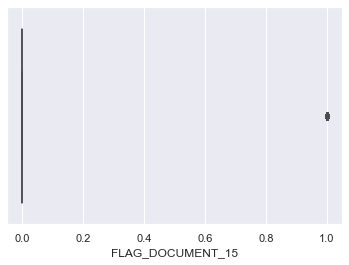

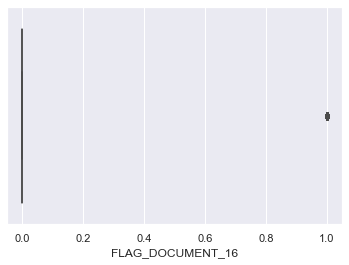

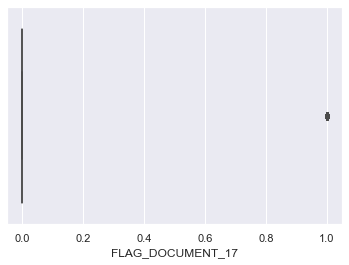

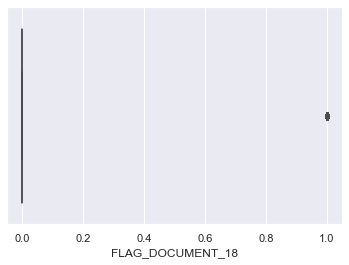

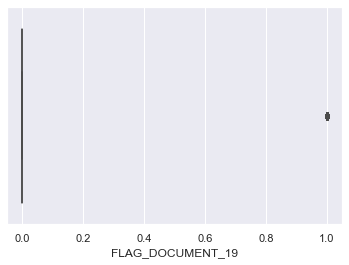

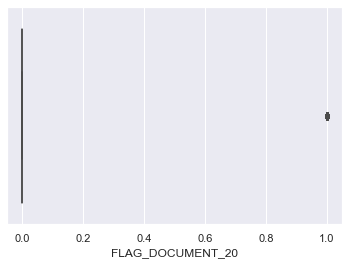

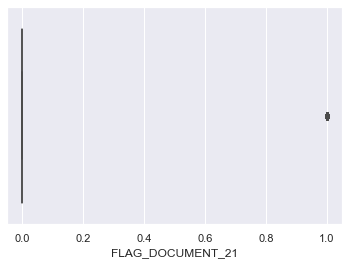

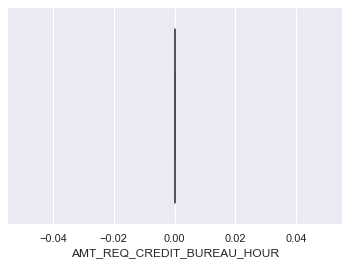

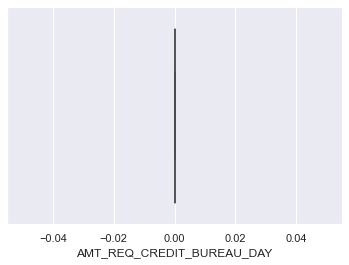

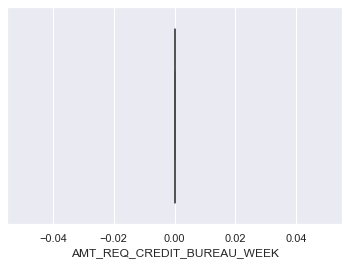

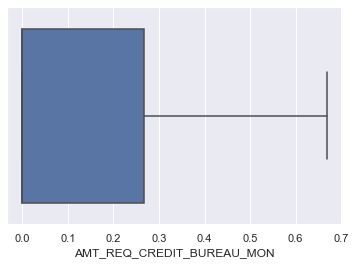

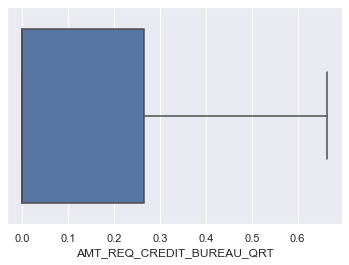

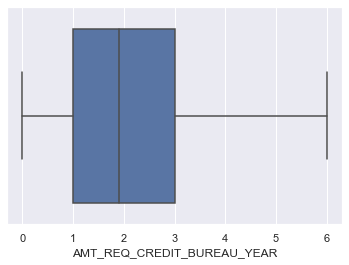

In [93]:
# Cek Setelah Handling Outlier
for i in applicant.columns:
    if applicant[i].dtype == 'float64' or applicant[i].dtype == 'int64':
        sns.boxplot(applicant[i])
        plt.show()

## EDA - Exploratory Data Analysis

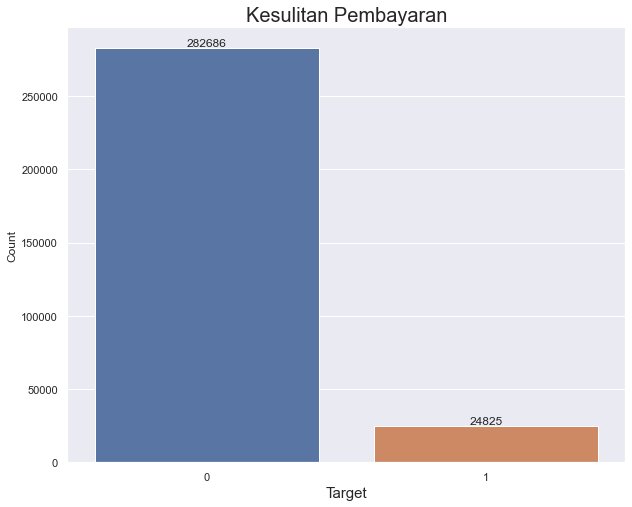

In [94]:
plt.figure(figsize=(10, 8))
a = sns.countplot(applicant['TARGET'])
for p in a.containers:
    a.bar_label(p, label_type='edge')
plt.xlabel('Target', fontsize=15)
plt.ylabel('Count')
plt.title('Kesulitan Pembayaran' , fontsize=20)
plt.show()

In [95]:
applicant['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

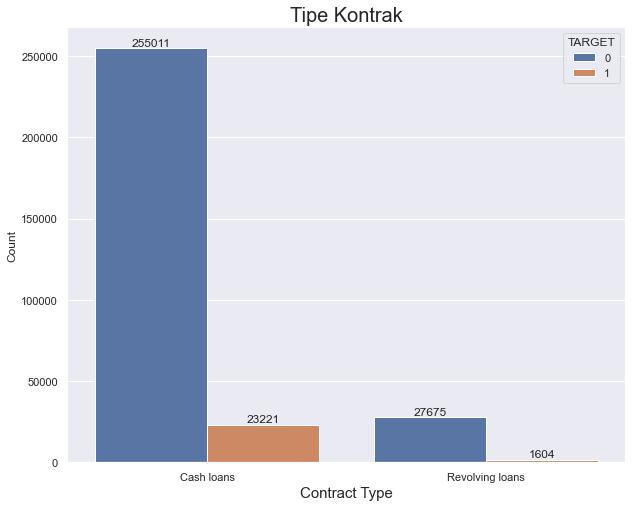

In [96]:
plt.figure(figsize=(10, 8))
a = sns.countplot(applicant['NAME_CONTRACT_TYPE'], hue=applicant['TARGET'])
for p in a.containers:
    a.bar_label(p, label_type='edge')
plt.xlabel('Contract Type', fontsize=15)
plt.ylabel('Count')
plt.title('Tipe Kontrak' , fontsize=20)
plt.show()

In [97]:
applicant[['NAME_CONTRACT_TYPE', 'TARGET']].value_counts()

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         255011
Revolving loans     0          27675
Cash loans          1          23221
Revolving loans     1           1604
dtype: int64

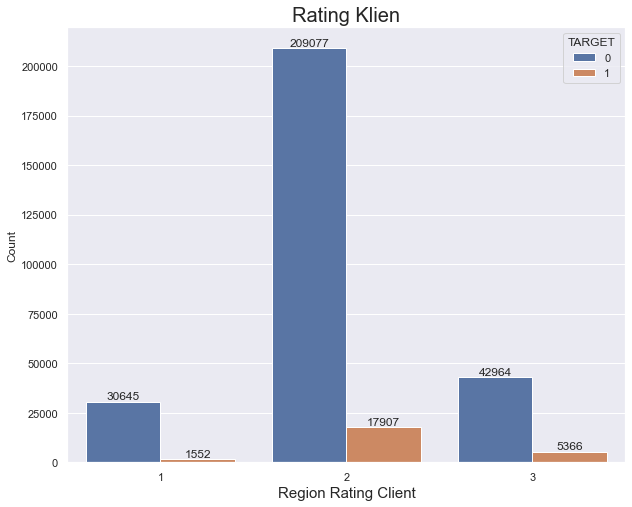

In [98]:
plt.figure(figsize=(10, 8))
a = sns.countplot(applicant["REGION_RATING_CLIENT"], hue=applicant['TARGET'])
for p in a.containers:
    a.bar_label(p, label_type='edge')
plt.xlabel('Region Rating Client', fontsize=15)
plt.ylabel('Count')
plt.title('Rating Klien' , fontsize=20)
plt.show()

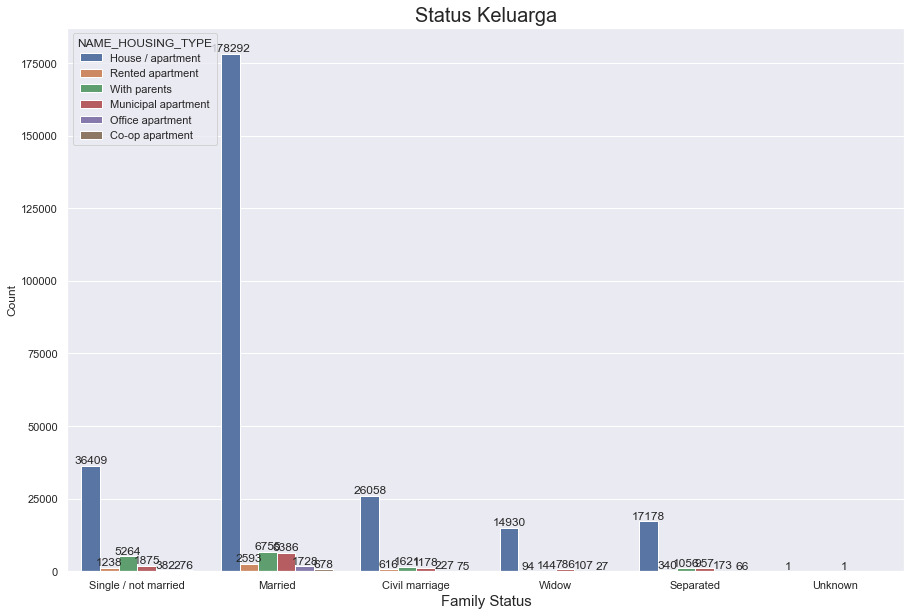

In [99]:
plt.figure(figsize=(15, 10))
a = sns.countplot(applicant["NAME_FAMILY_STATUS"], hue=applicant['NAME_HOUSING_TYPE'])
for p in a.containers:
    a.bar_label(p, label_type='edge')
plt.xlabel('Family Status', fontsize=15)
plt.ylabel('Count')
plt.title('Status Keluarga' , fontsize=20)
plt.show()

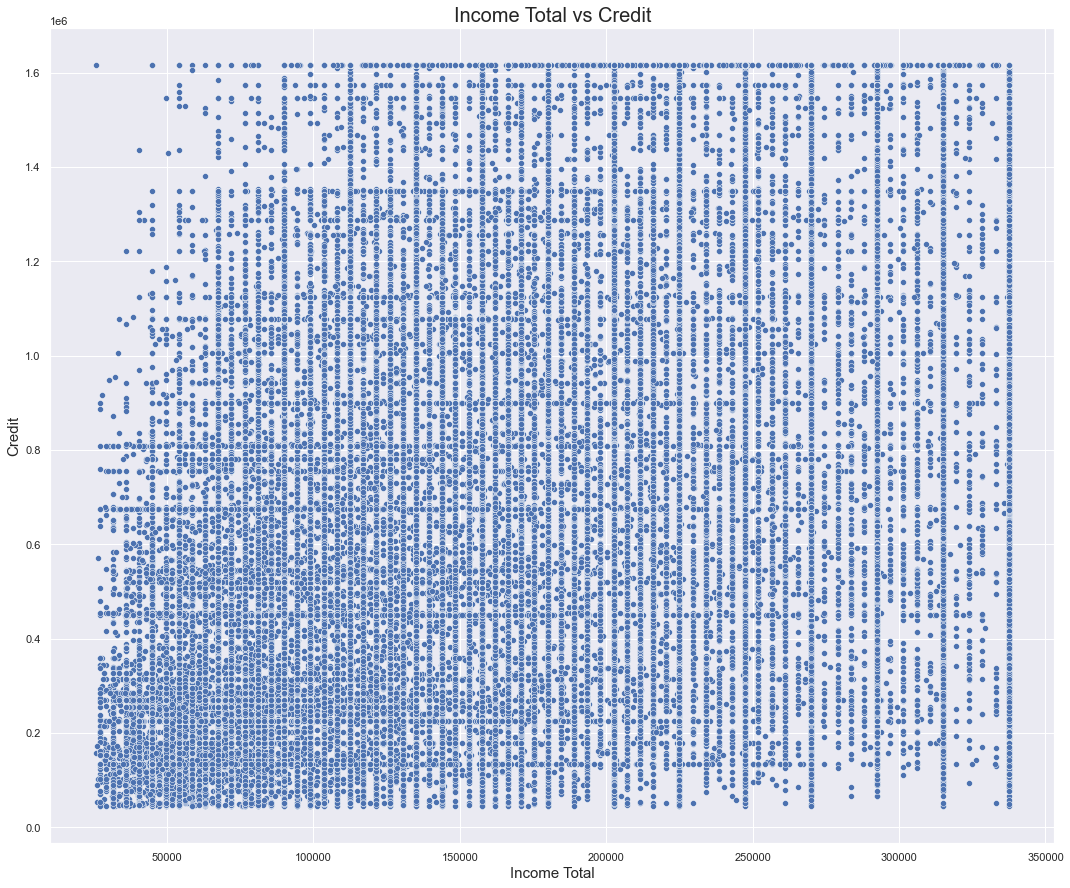

In [100]:
plt.figure(figsize=(18, 15))
sns.scatterplot(data=applicant, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')
plt.xlabel('Income Total', fontsize=15)
plt.ylabel('Credit', fontsize=15)
plt.title('Income Total vs Credit' , fontsize=20)
plt.show()

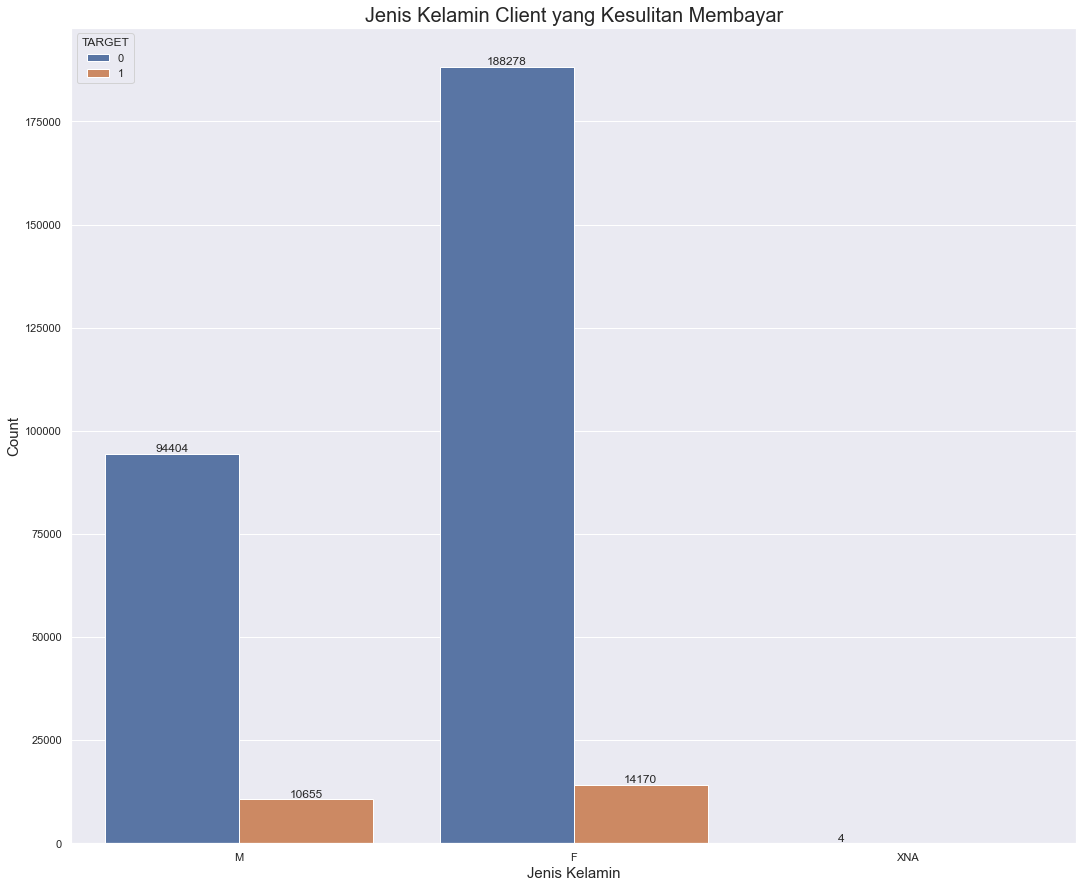

In [101]:
plt.figure(figsize=(18, 15))
a = sns.countplot(data=applicant, x='CODE_GENDER', hue='TARGET')
for p in a.containers:
    a.bar_label(p, label_type='edge')
plt.xlabel('Jenis Kelamin', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Jenis Kelamin Client yang Kesulitan Membayar' , fontsize=20)
plt.show()

## One Hot Encoding

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Tipe data object diubah ke numerik dengan LabelEncoder
for i in applicant.columns:
    if applicant[i].dtype == 'object':
        applicant[i] = le.fit_transform(applicant[i])

applicant.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,1.000000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.267395,0.265474,1.899974
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000


## Imbalance Data

In [103]:
X = applicant.drop(['TARGET'], axis=1)
y = applicant['TARGET']

In [104]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [105]:
X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0, 282686), (1, 282686)]


In [106]:
y.value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

## Feature Scaling

In [107]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [108]:
X

array([[0.00000000e+00, 0.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.66666667e-01],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.61398781e-06, 1.00000000e+00, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.29078211e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.51879305e-01, 4.32080463e-01],
       [1.72324163e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.54286926e-02],
       [5.31995520e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.66666667e-01]])

# Modeling

## Splitting Data

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
X_train.shape

(452297, 121)

## Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
model_Lr = LogisticRegression()
model_Lr.fit(X_train, y_train)

LogisticRegression()

In [112]:
model_pred_Lr = model_Lr.predict(X_test)
model_pred_Lr[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [113]:
print(classification_report(y_test, model_pred_Lr))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     56544
           1       0.83      0.83      0.83     56531

    accuracy                           0.83    113075
   macro avg       0.83      0.83      0.83    113075
weighted avg       0.83      0.83      0.83    113075



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_Rf = RandomForestClassifier()
model_Rf.fit(X_train, y_train)

In [ ]:
model_pred_Rf = model_Rf.predict(X_test)
model_pred_Rf[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [ ]:
print(classification_report(y_test, model_pred_Rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56477
           1       1.00      0.91      0.95     56598

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075



## XGBoost

In [115]:
import xgboost as xgb
model_Xgb = xgb.XGBClassifier()
model_Xgb.fit(X_train, y_train)

[13:50:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
model_pred_Xgb = model_Xgb.predict(X_test)
model_pred_Xgb[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [117]:
print(classification_report(y_test, model_pred_Xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56544
           1       1.00      0.91      0.95     56531

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075



### Predict Data Baru dengan Model Terbaik (XGBoost)

In [118]:
# Prediksi Data Baru
predict_baru = pd.read_csv('data/application_test.csv')
predict_baru.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Tipe data object diubah ke numerik dengan LabelEncoder
for i in predict_baru.columns:
    if predict_baru[i].dtype == 'object':
        predict_baru[i] = le.fit_transform(predict_baru[i])

predict_baru.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
predict_baru_pred = model_Xgb.predict(predict_baru)
predict_baru_pred[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [124]:
# Get feature importance
importance = model_Xgb.feature_importances_

# Create a dataframe to store feature importance
feature_importance = pd.DataFrame({'Feature': predict_baru.columns, 'Importance': importance})

# Sort the dataframe by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


In [125]:
print(feature_importance)

                          Feature  Importance
58              BASEMENTAREA_MODE    0.082021
72              BASEMENTAREA_MEDI    0.081614
90       OBS_30_CNT_SOCIAL_CIRCLE    0.073601
119     AMT_REQ_CREDIT_BUREAU_QRT    0.056666
55        NONLIVINGAPARTMENTS_AVG    0.051993
77                 ENTRANCES_MEDI    0.048012
25                     FLAG_PHONE    0.040936
118     AMT_REQ_CREDIT_BUREAU_MON    0.036697
62                 ELEVATORS_MODE    0.033803
3                    FLAG_OWN_CAR    0.033468
28                CNT_FAM_MEMBERS    0.027899
99                FLAG_DOCUMENT_6    0.027475
120    AMT_REQ_CREDIT_BUREAU_YEAR    0.025468
64                 FLOORSMAX_MODE    0.025313
69       NONLIVINGAPARTMENTS_MODE    0.025255
49                  ENTRANCES_AVG    0.024389
38        LIVE_CITY_NOT_WORK_CITY    0.021149
29           REGION_RATING_CLIENT    0.020035
78                 FLOORSMAX_MEDI    0.018178
63                 ENTRANCES_MODE    0.017771
42                   EXT_SOURCE_3 

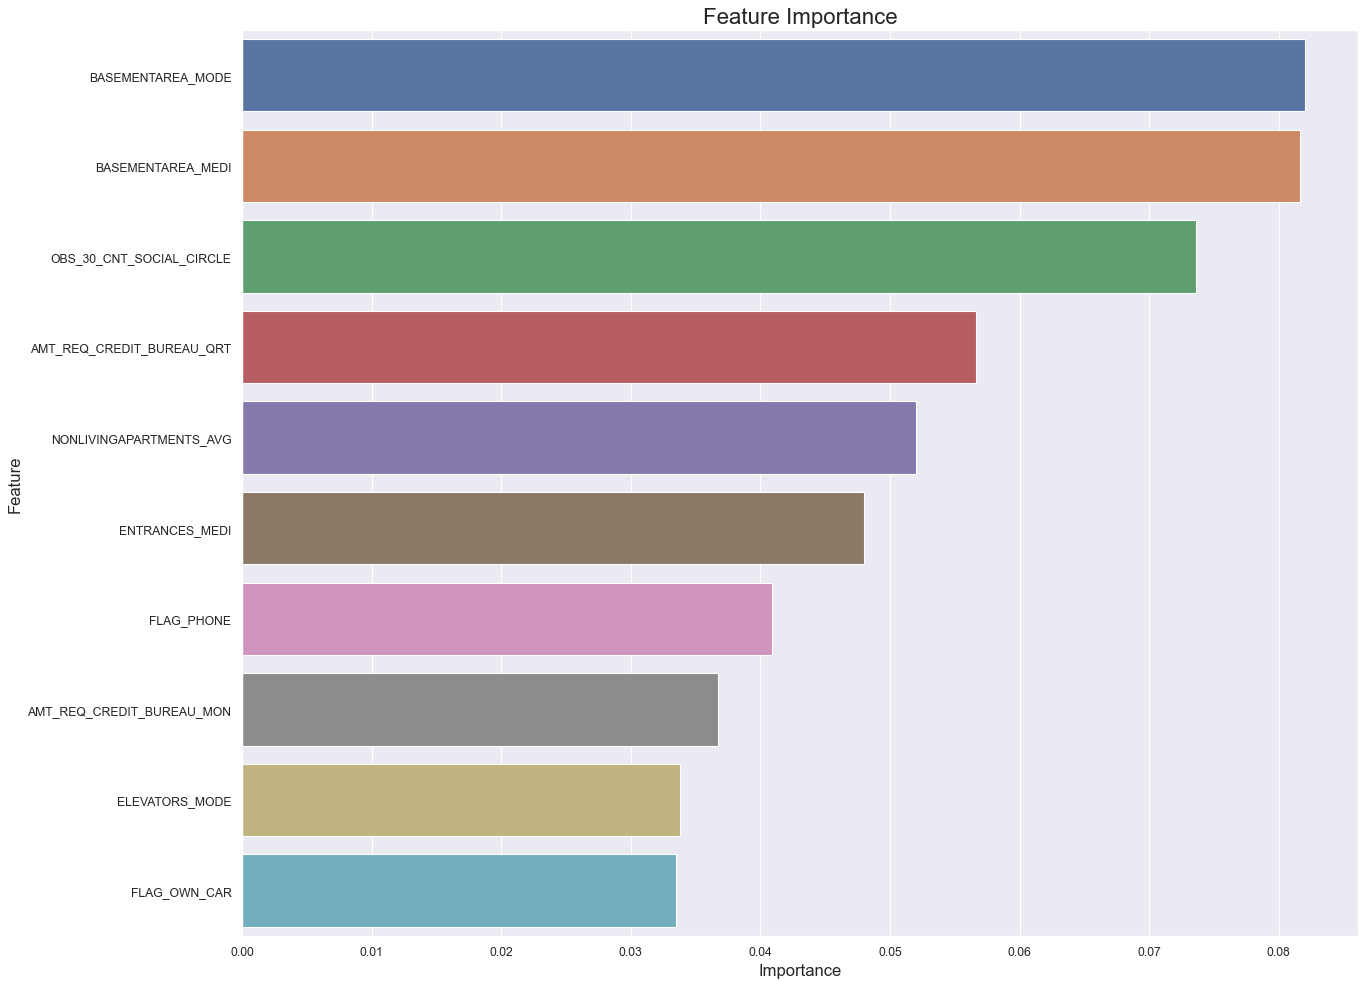

In [132]:
# Plot feature importance
plt.figure(figsize=(18, 15), dpi=80)
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Feature Importance', fontsize=20)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_Dt = DecisionTreeClassifier()
model_Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_pred_dt = model_Dt.predict(X_test)
model_pred_dt[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [ ]:
print(classification_report(y_test, model_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     56477
           1       0.90      0.91      0.90     56598

    accuracy                           0.90    113075
   macro avg       0.90      0.90      0.90    113075
weighted avg       0.90      0.90      0.90    113075



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_Gb = GradientBoostingClassifier()
model_Gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
model_pred_Gb = model_Gb.predict(X_test)
model_pred_Gb[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [ ]:
print(classification_report(y_test, model_pred_Gb))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     56477
           1       0.99      0.89      0.94     56598

    accuracy                           0.94    113075
   macro avg       0.95      0.94      0.94    113075
weighted avg       0.95      0.94      0.94    113075



# Evaluation

In [ ]:
# Eror Model
print('Mean Absolute Error Logistic Regression:', mean_absolute_error(y_test, model_pred_Lr))
print('Mean Absolute Error Random Forest:', mean_absolute_error(y_test, model_pred_Rf))
print('Mean Absolute Error XGBoost:', mean_absolute_error(y_test, model_pred_Xgb))
print('Mean Absolute Error Decision Tree:', mean_absolute_error(y_test, model_pred_dt))
print('Mean Absolute Error Gradient Boosting:', mean_absolute_error(y_test, model_pred_Gb))

Mean Absolute Error Logistic Regression: 0.1684810966172894
Mean Absolute Error Random Forest: 0.047747070528410346
Mean Absolute Error XGBoost: 0.045553835949590976
Mean Absolute Error Decision Tree: 0.096953349546761
Mean Absolute Error Gradient Boosting: 0.05647579040459872


In [ ]:
# Masukan eror model ke dalam dataframe
df = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting'],
                        'Mean Absolute Error': [mean_absolute_error(y_test, model_pred_Lr), mean_absolute_error(y_test, model_pred_Rf), mean_absolute_error(y_test, model_pred_Xgb), mean_absolute_error(y_test, model_pred_dt), mean_absolute_error(y_test, model_pred_Gb)]})
df.head()

,Model,Mean Absolute Error
0,Logistic Regression,0.168481
1,Random Forest,0.047747
2,XGBoost,0.045554
3,Decision Tree,0.096953
4,Gradient Boosting,0.056476


In [ ]:
# Akurasi Model
print('Accuracy Logistic Regression:', accuracy_score(y_test, model_pred_Lr))
print('Accuracy Random Forest:', accuracy_score(y_test, model_pred_Rf))
print('Accuracy XGBoost:', accuracy_score(y_test, model_pred_Xgb))
print('Accuracy Decision Tree:', accuracy_score(y_test, model_pred_dt))
print('Accuracy Gradient Boosting:', accuracy_score(y_test, model_pred_Gb))

Accuracy Logistic Regression: 0.8315189033827106
Accuracy Random Forest: 0.9522529294715897
Accuracy XGBoost: 0.954446164050409
Accuracy Decision Tree: 0.903046650453239
Accuracy Gradient Boosting: 0.9435242095954013


In [ ]:
# Gabungkan akurasi model ke dalam dataframe
df['Accuracy'] = [accuracy_score(y_test, model_pred_Lr), accuracy_score(y_test, model_pred_Rf), accuracy_score(y_test, model_pred_Xgb), accuracy_score(y_test, model_pred_dt), accuracy_score(y_test, model_pred_Gb)]
df.head()

,Model,Mean Absolute Error,Accuracy
0,Logistic Regression,0.168481,0.831519
1,Random Forest,0.047747,0.952253
2,XGBoost,0.045554,0.954446
3,Decision Tree,0.096953,0.903047
4,Gradient Boosting,0.056476,0.943524


In [ ]:
# ROC AUC Score
print('ROC AUC Score Logistic Regression:', roc_auc_score(y_test, model_pred_Lr))
print('ROC AUC Score Random Forest:', roc_auc_score(y_test, model_pred_Rf))
print('ROC AUC Score XGBoost:', roc_auc_score(y_test, model_pred_Xgb))
print('ROC AUC Score Decision Tree:', roc_auc_score(y_test, model_pred_dt))
print('ROC AUC Score Gradient Boosting:', roc_auc_score(y_test, model_pred_Gb))

ROC AUC Score Logistic Regression: 0.8315270099638683
ROC AUC Score Random Forest: 0.9523012617715677
ROC AUC Score XGBoost: 0.9544907323811249
ROC AUC Score Decision Tree: 0.903036858253029
ROC AUC Score Gradient Boosting: 0.9435767810204372


In [ ]:
df['ROC AUC'] = [roc_auc_score(y_test, model_pred_Lr), roc_auc_score(y_test, model_pred_Rf), roc_auc_score(y_test, model_pred_Xgb), roc_auc_score(y_test, model_pred_dt), roc_auc_score(y_test, model_pred_Gb)]
df.head()

,Model,Mean Absolute Error,Accuracy,ROC AUC
0,Logistic Regression,0.168481,0.831519,0.831527
1,Random Forest,0.047747,0.952253,0.952301
2,XGBoost,0.045554,0.954446,0.954491
3,Decision Tree,0.096953,0.903047,0.903037
4,Gradient Boosting,0.056476,0.943524,0.943577


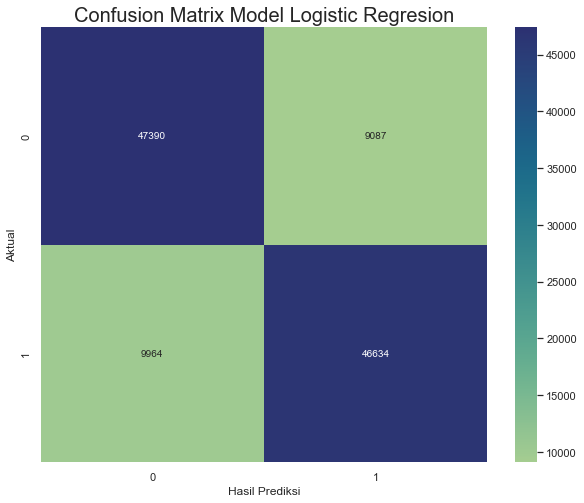

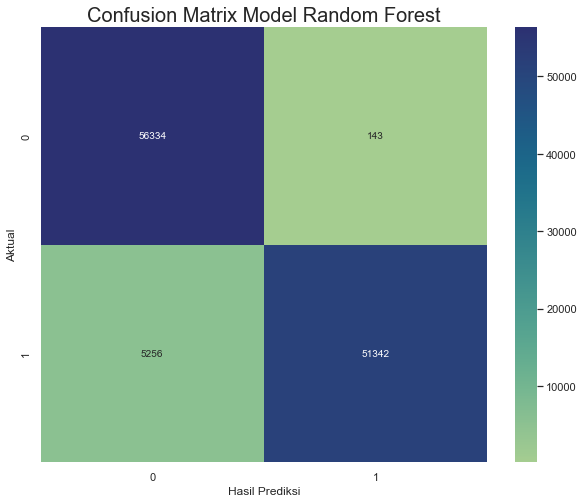

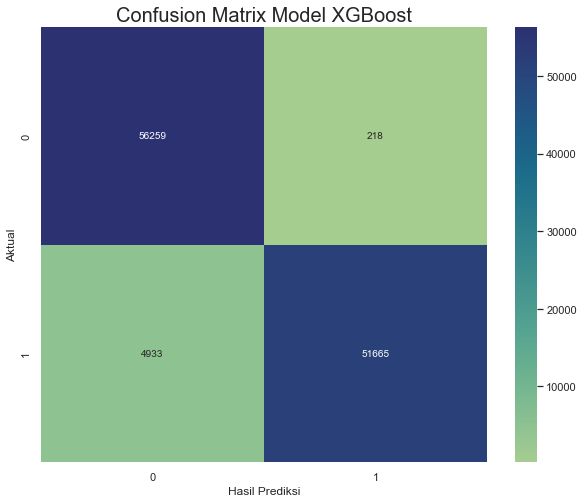

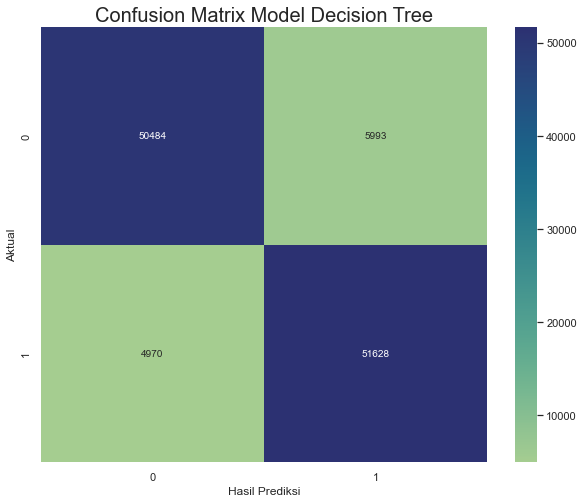

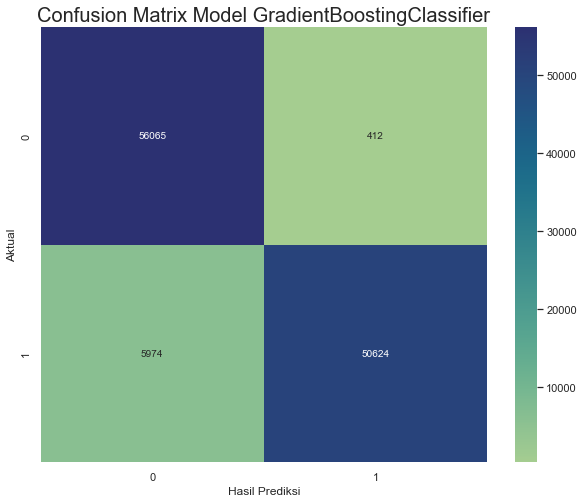

In [ ]:
definisikan = ['Logistic Regresion', 'Random Forest', 'XGBoost', 'Decision Tree', 'GradientBoostingClassifier']
def matrix_konfusi(model):
    cm = confusion_matrix(y_test, model)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
    plt.xlabel('Hasil Prediksi')
    plt.ylabel('Aktual')
    plt.title('Confusion Matrix Model ' + definisikan[i], fontsize=20)
    plt.show()

for i in range(len(definisikan)):
    matrix_konfusi([model_pred_Lr, model_pred_Rf, model_pred_Xgb, model_pred_dt, model_pred_Gb][i])
